In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iid_dfs = [
    pd.read_csv(
        f"train_iid_wine_norm_{idx}.csv",
        header=None,
    )
    for idx in range(5)
]
niid_dfs = [
    pd.read_csv(
        f"train_niid_wine_norm_{idx}.csv",
        header=None,
    )
    for idx in range(5)
]

In [4]:
iid_dfs[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.723008,0.319491,0.102199,0.520154,1.062583,0.740896,0.498993,0.305176,0.943927,0.158488,0.566508,0.631529,0.580304,1.0
1,0.343558,0.262189,1.068947,0.794786,0.287208,0.163044,0.383191,0.977114,0.276256,0.774107,-0.066903,0.070285,0.614116,2.0
2,0.843803,0.204391,0.700703,-0.009626,0.799267,-0.006330,-0.003590,1.168353,0.193950,0.610937,0.372918,0.036880,0.471529,2.0
3,0.231597,-0.043946,0.605717,0.471600,0.343241,0.207814,0.399988,0.729403,0.010185,0.247020,0.908624,0.585729,0.202051,1.0
4,-0.201411,0.619903,0.309618,0.847769,-0.151025,0.586110,0.246331,0.353715,0.834599,-0.142059,0.179698,1.005610,-0.259435,1.0


In [5]:
for idx, iid_df in enumerate(iid_dfs):
    iid_df.rename(columns={13: 'labels'}, inplace=True)
for idx, niid_df in enumerate(niid_dfs):
    niid_df.rename(columns={13: 'labels'}, inplace=True)


In [8]:
from collections import Counter


In [9]:
for idx, iid_df in enumerate(iid_dfs):
    print(f"Dataset {idx}")
    print(Counter(iid_df['labels']))

Dataset 0
Counter({1.0: 60, 0.0: 45, 2.0: 38})
Dataset 1
Counter({0.0: 49, 2.0: 47, 1.0: 47})
Dataset 2
Counter({1.0: 66, 0.0: 41, 2.0: 35})
Dataset 3
Counter({1.0: 54, 0.0: 53, 2.0: 35})
Dataset 4
Counter({0.0: 51, 1.0: 49, 2.0: 42})


| Dataset   | 0.0 | 1.0 | 2.0 |
|-----------|-----|-----|-----|
| Dataset 0 |  45 |  60 |  38 |
| Dataset 1 |  49 |  47 |  47 |
| Dataset 2 |  41 |  66 |  35 |
| Dataset 3 |  53 |  54 |  35 |
| Dataset 4 |  51 |  49 |  42 |


In [10]:
for idx, niid_df in enumerate(niid_dfs):
    print(f"Dataset {idx}")
    print(Counter(niid_df["labels"]))

Dataset 0
Counter({2.0: 143})
Dataset 1
Counter({0.0: 143})
Dataset 2
Counter({0.0: 96, 2.0: 25, 1.0: 21})
Dataset 3
Counter({1.0: 142})
Dataset 4
Counter({1.0: 113, 2.0: 29})


| Dataset   | 0.0 | 1.0 | 2.0 |
|-----------|-----|-----|-----|
| Dataset 0 |  -  |  -  | 143 |
| Dataset 1 | 143 |  -  |  -  |
| Dataset 2 |  96 |  21 |  25 |
| Dataset 3 |  -  | 142 |  -  |
| Dataset 4 |  -  | 113 |  29 |


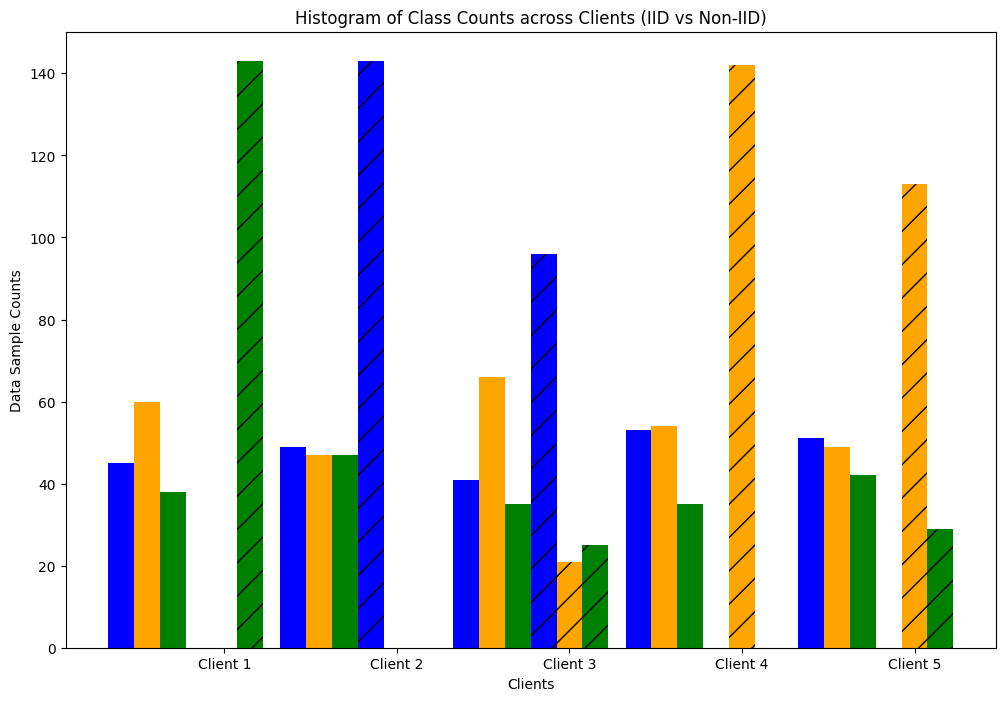

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tikzplotlib

# Data for IID setting
datasets = ["Client 1", "Client 2", "Client 3", "Client 4", "Client 5"]
counts_0_iid = [45, 49, 41, 53, 51]  # Counts for class 0.0
counts_1_iid = [60, 47, 66, 54, 49]  # Counts for class 1.0
counts_2_iid = [38, 47, 35, 35, 42]  # Counts for class 2.0


# Data for Non-IID setting
counts_0_non_iid = [0, 143, 96, 0, 0]  # Counts for class 0.0
counts_1_non_iid = [0, 0, 21, 142, 113]  # Counts for class 1.0
counts_2_non_iid = [143, 0, 25, 0, 29]  # Counts for class 2.0

x = np.arange(len(datasets))  # the label locations
width = 0.15  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot IID data
bars1_iid = ax.bar(
    x - width * 1.5, counts_0_iid, width, label="Class 0.0 (IID)", color="blue"
)
bars2_iid = ax.bar(
    x - width * 0.5, counts_1_iid, width, label="Class 1.0 (IID)", color="orange"
)
bars3_iid = ax.bar(
    x + width * 0.5, counts_2_iid, width, label="Class 2.0 (IID)", color="green"
)

# Plot Non-IID data
bars1_non_iid = ax.bar(
    x + width * 1.5,
    counts_0_non_iid,
    width,
    label="Class 0.0 (Non-IID)",
    color="blue",
    hatch="/",
)
bars2_non_iid = ax.bar(
    x + width * 2.5,
    counts_1_non_iid,
    width,
    label="Class 1.0 (Non-IID)",
    color="orange",
    hatch="/",
)
bars3_non_iid = ax.bar(
    x + width * 3.5,
    counts_2_non_iid,
    width,
    label="Class 2.0 (Non-IID)",
    color="green",
    hatch="/",
)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel("Clients")
ax.set_ylabel("Data Sample Counts")
ax.set_title("Histogram of Class Counts across Clients (IID vs Non-IID)")
ax.set_xticks(x + width * 2.5)  # Adjust the ticks to match the center of the bars
ax.set_xticklabels(datasets)
# ax.legend()

# Adjust layout
tikzplotlib.save("histogram-wine-iid-niid.tex")

# Show the plot
plt.show()